# **Welcome to our project report! ✨🧪**
## 🚀 *Overview*
This notebook presents an analysis of our pKa prediction package. 

## 🤯 *Acquiring Dataset*
In a first step, we will acquire the [pKa dataset](https://github.com/cbio3lab/pKa/blob/main/Data/test_acids_bases_descfinal_nozwitterions.csv) from cbio3lab's repository, initially extracted from the Harvard [dataverse](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/6A67L9).

Next, we will perform an exploratory analysis of the collected dataset.

1) Let's download the data directly into your working directory:

In [23]:
import requests

# Correct raw file URL
url = "https://raw.githubusercontent.com/anastasiafloris/pKaPredict/main/data/pkadatasetRAWDATA.csv"
file_name = "pkadatasetRAWDATA.csv"

try:
    response = requests.get(url)
    response.raise_for_status()  # Raise an error if the request fails

    # Check if the content is an HTML page (meaning it's the wrong link)
    if "<!DOCTYPE html>" in response.text:
        print("❌ Error: This is an HTML page, not the CSV file. Check your URL.")
    else:
        with open(file_name, "wb") as file:
            file.write(response.content)
        print(f"✅ File downloaded successfully: {file_name}")

except requests.exceptions.RequestException as e:
    print(f"❌ Failed to download file: {e}")

✅ File downloaded successfully: pkadatasetRAWDATA.csv


2) Let's open the file and verify its existence as well as display a preview of the latter:

In [24]:
import pandas as pd
from pathlib import Path

# Define the current working directory
current_directory = Path.cwd()
print("Current Directory:", current_directory.resolve())

# Specify the path to the dataset file
file_path = current_directory / "pkadatasetRAWDATA.csv"

# Verify the file's existence and read its contents if available
if file_path.exists():
    print("The dataset file exists. Reading the file contents...\n")
    
    # Open and display the contents (optional, for verification)
    with file_path.open("r") as file:
        content = file.read()
        print(content[:500])  # Print only the first 500 characters for preview
    
    # Load the dataset using pandas
    try:
        data_pka = pd.read_csv(file_path, delimiter=",")  # Adjust delimiter if necessary
        print("\nDataset successfully loaded. Preview:")
        print(data_pka.head())  # Display first few rows
    except Exception as e:
        print(f"Error loading dataset: {e}")

else:
    print("Error: The specified file does not exist.")


Current Directory: /Users/anastasiafloris/Desktop/pKaPredict/pKaPredict/notebooks
The dataset file exists. Reading the file contents...

Compound,set,Smiles,pka,prot_smiles,deprot_smiles,acid_base_type,acid_base_string,prot_charge,deprot_charge,CH_strength,XH_strength,HBA_strength,Hyd_Apolar,Hyd_Polar,Hyd,CCCC,NCCC,CCNC,CCCO,CCNN,NCCN,CNNC,CNCN,NCCO,CNCO,CNNN,NCNN,OCNN,CCSO,NCSO,nA,nR,nN,nD,nC,nF,nQ,nE,nG,nH,nI,nP,nL,nK,nM,nS,nT,nY,nV,nW,BCUTw.1l,BCUTw.1h,BCUTc.1l,BCUTc.1h,BCUTp.1l,BCUTp.1h,Fsp3,XLogP,MW,LipinskiFailures,nRotB,MLogP,nAtomLAC,nAtomP,nAtomLC,nB,nBase,nAtom,nAromBond,naAromAtom,ALogP,ALogp2,AMR,nAcid,nSmallRings,nAr

Dataset successfully loaded. Preview:
   Compound   set                             Smiles    pka  \
0         4  test            Brc1ccc(-c2nn[nH]n2)cc1   3.73   
1         6  test                Brc1ccc(C2NCCS2)cc1   5.05   
2         7  test  Brc1ccc(Cc2c3ccccc3nc3ccccc23)cc1   7.00   
3        18  test  Brc1cccc(Br)c1N(C1=NCCN1)C1CCCCC1  11.30   
4       

## 🧹 *Cleaning Dataset*

✅ Prints initial dataset shape <br> 
✅ Counts and removes missing values (NaN)  <br>
✅ Prints final dataset shape after cleaning  <br>
✅ Generates a histogram to visualize pKa value distribution  <br>

✅ Dataset successfully loaded.

🔹 Checking dataset information:
Initial dataset shape: (1297, 274)
Column names: ['Compound', 'set', 'Smiles', 'pka', 'prot_smiles', 'deprot_smiles', 'acid_base_type', 'acid_base_string', 'prot_charge', 'deprot_charge', 'CH_strength', 'XH_strength', 'HBA_strength', 'Hyd_Apolar', 'Hyd_Polar', 'Hyd', 'CCCC', 'NCCC', 'CCNC', 'CCCO', 'CCNN', 'NCCN', 'CNNC', 'CNCN', 'NCCO', 'CNCO', 'CNNN', 'NCNN', 'OCNN', 'CCSO', 'NCSO', 'nA', 'nR', 'nN', 'nD', 'nC', 'nF', 'nQ', 'nE', 'nG', 'nH', 'nI', 'nP', 'nL', 'nK', 'nM', 'nS', 'nT', 'nY', 'nV', 'nW', 'BCUTw.1l', 'BCUTw.1h', 'BCUTc.1l', 'BCUTc.1h', 'BCUTp.1l', 'BCUTp.1h', 'Fsp3', 'XLogP', 'MW', 'LipinskiFailures', 'nRotB', 'MLogP', 'nAtomLAC', 'nAtomP', 'nAtomLC', 'nB', 'nBase', 'nAtom', 'nAromBond', 'naAromAtom', 'ALogP', 'ALogp2', 'AMR', 'nAcid', 'nSmallRings', 'nAromRings', 'nRingBlocks', 'nAromBlocks', 'nRings3', 'nRings4', 'nRings5', 'nRings6', 'nRings7', 'nRings8', 'nRings9', 'tpsaEfficiency', 'Zagreb', 'WPATH', 'WP

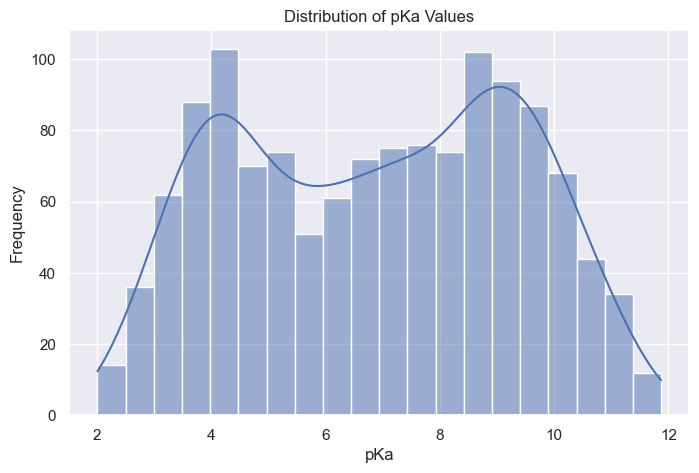

,Compound,set,Smiles,pka,prot_smiles,deprot_smiles,acid_base_type,acid_base_string,prot_charge,deprot_charge,...,ATSm5,ATSc1,ATSc2,ATSc3,ATSc4,ATSc5,nHBDon,nHBAcc,bpol,apol
0,4,test,Brc1ccc(-c2nn[nH]n2)cc1,3.73,Brc1ccc(-c2nn[nH]n2)cc1,Brc1ccc(-c2nn[n-]n2)cc1,acidic,A,0,-1,...,16.982131,0.092406,-0.049547,0.007228,0.005439,0.003309,1,3,7.416035,23.103965
1,6,test,Brc1ccc(C2NCCS2)cc1,5.05,Brc1ccc(C2NCCS2)cc1,Brc1ccc(C2[NH2+]CCS2)cc1,basic,B,1,0,...,19.324610,0.106754,-0.072082,0.017678,0.005596,0.000479,1,1,15.162070,29.557930
2,7,test,Brc1ccc(Cc2c3ccccc3nc3ccccc23)cc1,7.00,Brc1ccc(Cc2c3ccccc3[nH+]c3ccccc23)cc1,Brc1ccc(Cc2c3ccccc3nc3ccccc23)cc1,basic,B,1,0,...,37.151221,0.092960,-0.041298,-0.013032,0.016142,-0.007716,0,1,17.914898,48.685102
3,18,test,Brc1cccc(Br)c1N(C1=NCCN1)C1CCCCC1,11.30,Brc1cccc(Br)c1N(C1=[NH+]CCN1)C1CCCCC1,Brc1cccc(Br)c1N(C1=NCCN1)C1CCCCC1,basic,B,1,0,...,111.835963,0.239813,-0.173828,0.098983,-0.044103,-0.071317,1,3,27.310933,48.469067
4,21,test,Brc1cccc(Br)c1N(CC1CCCC1)C1=NCCN1,10.90,Brc1cccc(Br)c1N(CC1CCCC1)C1=[NH+]CCN1,Brc1cccc(Br)c1N(CC1CCCC1)C1=NCCN1,basic,B,1,0,...,108.669781,0.241317,-0.177460,0.105635,-0.051910,-0.065520,1,3,27.310933,48.469067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1292,6383,test,O=C(O)c1nc(Cl)ccc1Cl,2.32,O=C(O)c1nc(Cl)ccc1Cl,O=C([O-])c1nc(Cl)ccc1Cl,acidic,A,0,-1,...,23.047740,0.350794,-0.157665,-0.063998,0.088893,-0.083590,1,3,6.397621,19.624379
1293,6384,test,O=C1CCCN1CC#CCN1CCCC1,8.40,O=C1CCCN1CC#CC[NH+]1CCCC1,O=C1CCCN1CC#CCN1CCCC1,basic,B,1,0,...,11.664456,0.319451,-0.223327,0.119830,-0.025091,-0.094689,0,3,24.595726,36.124274
1294,6390,test,NCCCCS(=O)(=O)c1ccccc1,10.00,[NH3+]CCCCS(=O)(=O)c1ccccc1,NCCCCS(=O)(=O)c1ccccc1,basic,B,1,0,...,19.498304,0.188467,-0.051143,-0.023944,0.001780,-0.004040,1,3,22.214105,33.205895
1295,6394,test,NCCSc1ccccc1,9.00,[NH3+]CCSc1ccccc1,NCCSc1ccccc1,basic,B,1,0,...,7.835967,0.051824,-0.017572,-0.023599,0.018593,-0.001723,1,1,13.645277,25.414723


In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "pkadatasetRAWDATA.csv"

try:
    data_pka = pd.read_csv(file_path, sep=None, engine="python")  # Auto-detect delimiter
    print("✅ Dataset successfully loaded.")
except Exception as e:
    print(f"❌ Error loading dataset: {e}")
    data_pka = None

# Remove missing values and check dataset shape
def clean_and_visualize_pka(data_pka):
    """Cleans dataset by removing NaN values and visualizes pKa distribution."""
    
    if data_pka is None or data_pka.empty:
        print("❌ Error: Dataset is empty or not loaded.")
        return

    # Check initial shape
    print("\n🔹 Checking dataset information:")
    print(f"Initial dataset shape: {data_pka.shape}")
    print(f"Column names: {data_pka.columns.tolist()}")
    print(f"First few rows:\n{data_pka.head()}")

    # Ensure "pka" column exists (case-sensitive)
    if "pka" not in data_pka.columns:
        print("❌ Error: 'pka' column not found in dataset.")
        return
    
    # Check for missing values
    missing_values = data_pka["pka"].isnull().sum()
    print(f"\nTotal missing values in 'pka': {missing_values}")

    # Drop NaN values
    data_pka.dropna(subset=["pka"], inplace=True)

    # Check final shape after cleaning
    print(f"Dataset shape after NaN removal: {data_pka.shape}")

    # Generate histogram for pKa distribution
    print("\n📊 Generating histogram for pKa distribution...\n")
    sns.set_theme()
    plt.figure(figsize=(8, 5))
    sns.histplot(data=data_pka, x="pka", binwidth=0.5, kde=True)
    plt.xlabel("pKa")
    plt.ylabel("Frequency")
    plt.title("Distribution of pKa Values")
    plt.show()

    return data_pka  # Return cleaned dataset for further processing

# Call the function
clean_and_visualize_pka(data_pka)
